In [1]:
import os
import sys

main_module_path = os.getcwd().replace('/notebook', '')
sys.path.append(main_module_path)
import perceptron.core as perceptron_core

In [2]:
import numpy
import pandas
import matplotlib
import sklearn.preprocessing as sklearn_preprocessing

### Titanic Dataset

In [3]:
dataset_value_map = {'Sex': {'male': 0, 'female': 1}}

training_dataframe = pandas.read_csv('./titanic/train.csv')
training_dataframe.replace(dataset_value_map, inplace=True)
training_dataframe.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [4]:
training_data = sklearn_preprocessing.minmax_scale(training_dataframe[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']].values)
training_target = training_dataframe[['Survived']].values

In [23]:
bias = 1.0
threshold = 10000
learning_rate = 0.001
weights = numpy.random.uniform(low=0.0, high=1.0, size=(training_data.shape[1] + 1))

average_errors = []

for _ in range(threshold):
    for n in range(training_data.shape[0]):
        predict = perceptron_core.Perceptron(training_data[n], weights)
        error = training_target[n] - predict.value
        
        weights[0] += learning_rate * error * perceptron_core.linear_interceptor_sigmoid_derivative(predict.value)
        weights[1:] += learning_rate * error * perceptron_core.linear_slope_sigmoid_derivative(
            training_data[n], predict.total_sum, predict.value)
        
    average_errors.append(perceptron_core.mean_square_error(training_data, weights, training_target))

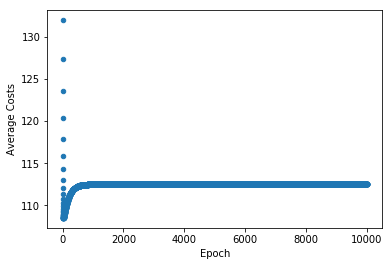

In [25]:
learning_dataframe = pandas.DataFrame(data=numpy.c_[average_errors], columns=['Average Costs'])
learning_dataframe.index.name = 'Epoch'
learning_dataframe.reset_index().plot(kind='scatter', x='Epoch', y='Average Costs')

In [28]:
testing_dataframe = pandas.read_csv('./titanic/test.csv')
testing_dataframe.replace(dataset_value_map, inplace=True)

In [30]:
testing_data = sklearn_preprocessing.minmax_scale(testing_dataframe[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']].values)
testing_target = training_dataframe[['Survived']].values

In [34]:
predicts = numpy.array([perceptron_core.Perceptron(data, weights).value for data in testing_data])
predicts

array([0.30597081, 0.58041626, 0.28440712, 0.30598537, 0.58739923,
       0.30599521, 0.55302235, 0.31406912, 0.55301421, 0.3556278 ,
       0.30597197, 0.26401671, 0.5307144 , 0.30795075, 0.53028189,
       0.55536085, 0.28445173, 0.30596024, 0.58043481, 0.55301412,
       0.286836  , 0.31193224, 0.50180087, 0.27012751, 0.55546094,
       0.33029951, 0.50949993, 0.30596024, 0.26408871, 0.35558119,
       0.30795075, 0.33234011, 0.59440676, 0.59446382, 0.28680821,
       0.30596032, 0.55303091, 0.55304338, 0.30600002, 0.30682231,
       0.31211332, 0.26402551, 0.30597117, 0.52734734, 0.5301051 ,
       0.30597248, 0.26407591, 0.30596942, 0.50271901, 0.56713802,
       0.28684611, 0.2844967 , 0.58950447, 0.60295528, 0.28450585,
       0.41522979, 0.30597197, 0.30596767, 0.33032865, 0.50654873,
       0.30597197, 0.284471  , 0.30596942, 0.5530243 , 0.32610995,
       0.52751151, 0.55302744, 0.26427916, 0.26405731, 0.56245174,
       0.55302481, 0.30597197, 0.55302837, 0.26404424, 0.50550